### 1. INSTALLING AND IMPORTING LIBRARY PACKAGES

In [2]:
import warnings
warnings.filterwarnings('ignore')
!pip install librosa
!pip install gap_stat
!pip install audiomentations

  Created wheel for audioread: filename=audioread-3.0.0-py3-none-any.whl size=23706 sha256=1e08a9138ca9ced03ad0cbff255a9037b28b9efa63d12fd7eb0a4a1dab72a601
  Stored in directory: c:\users\vpara\appdata\local\pip\cache\wheels\e4\76\a4\cfb55573167a1f5bde7d7a348e95e509c64b2c3e8f921932c3
Successfully built audioread


In [1]:
import random
from librosa import feature
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import soundfile as sf
import librosa
from audiomentations import Compose, AddGaussianNoise, PitchShift, HighPassFilter


import numpy as np
import pandas as pd


### 2. BUILDIN DATASET

#### Data Augmentation- Audio Files

In [2]:
def frequency_modulation(audio, freq_mod_rate):
    return librosa.effects.time_stretch(audio, freq_mod_rate)

def pitch_shift(audio, audiorate, num_semitones):
    return librosa.effects.pitch_shift(audio, audiorate, num_semitones)

def amplitude_modulation(audio, min_factor=0.1, max_factor=0.12):
    gain_rate = random.uniform(min_factor, max_factor)
    augmented_audio = audio * gain_rate
    return augmented_audio

def invert_polarity(audio):
    return audio * -1

In [16]:
#    audio, a_rate = librosa.load("C:/Users/vpara/Documents/12.GTZAN-Genre-Collection/genres/blues/blues.00000.au")
#    augmented_audio_fm = frequency_modulation(audio,0.8)
#    sf.write("C:/Users/vpara/Documents/12.GTZAN-Genre-Collection/genres/blues/augmented_tm_blues.00000.au", augmented_signal_fm, a_rate)
#    augmented_audio_ps = pitch_shift(audio,a_rate,2)
#    sf.write("C:/Users/vpara/Documents/12.GTZAN-Genre-Collection/genres/blues/augmented_ps_blues.00000.au", augmented_signal_ps, a_rate)
#    augmented_audio_am = amplitude_modulation(audio,2,4)
#    _plot_signal_and_augmented_signal(audio, augmented_signal_am, a_rate)

In [3]:
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

def audio_data_augmentation(genres=GENRES,path ="genres/"):
    count = 0
    for genre in genres:
        for filename in os.listdir(f"{path}{genre}"):
            count += 1
            if count == 76:            # 75 samples for each kind of augmentation technique = 300 + original 100
                break
            else:
                file_path = os.path.join(f"{path}{genre}",filename)
                audio, a_rate = librosa.load(file_path)
            
                augmented_audio_fm = frequency_modulation(audio,0.8)
                filename_aug_fm = "augmented_fm_" + filename
                file_path_aug_fm = os.path.join(f"{path}{genre}",filename_aug_fm)
                sf.write(file_path_aug_fm, augmented_audio_fm, a_rate)
            
                augmented_audio_ps = pitch_shift(audio,a_rate,2)
                filename_aug_ps = "augmented_ps_" + filename
                file_path_aug_ps = os.path.join(f"{path}{genre}",filename_aug_ps)           
                sf.write(file_path_aug_ps, augmented_audio_ps, a_rate)            
            
                augmented_audio_am = amplitude_modulation(audio,2,4)            
                filename_aug_am = "augmented_am_" + filename
                file_path_aug_am = os.path.join(f"{path}{genre}",filename_aug_am)           
                sf.write(file_path_aug_am, augmented_audio_am, a_rate)                        
            
                augmented_audio_ip = invert_polarity(audio)          
                filename_aug_ip = "augmented_ip_" + filename
                file_path_aug_ip = os.path.join(f"{path}{genre}",filename_aug_ip) 
                sf.write(file_path_aug_ip, augmented_audio_ip, a_rate)
        count = 0                   


In [ ]:
audio_data_augmentation()

C:\Users\vpara\AppData\Local\Temp/ipykernel_11868/4060285809.py:2: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(audio, freq_mod_rate)
C:\Users\vpara\AppData\Local\Temp/ipykernel_11868/4060285809.py:5: FutureWarning: Pass sr=22050, n_steps=2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(audio, audiorate, num_semitones)


In [4]:
def audio_values(genres=GENRES,path ="genres/"):    
    songs = []
    for genre in genres:
        genre_files = []
        for f_name in os.listdir(f"{path}{genre}"):
            genre_files.append(sf.read(os.path.join(f"{path}{genre}",f_name)))
        songs.append(genre_files)
    return songs

In [5]:
songs = audio_values()

In [6]:
def audio_descriptors(songs=songs):
    global artbtry_matrix
    artbtry_matrix = np.random.rand(12,128)
    descriptor = np.zeros((1,2*12+1))
    for g_class, genre in enumerate(songs):
        for song, a_rate in genre:
            spectrogram = feature.melspectrogram(y=song,sr=a_rate)            
            dot = np.dot(artbtry_matrix, spectrogram) 
            artbtry_features = np.array([g_class])
            for descp in dot:
                artbtry_features = np.hstack([np.array([descp.mean(),np.std(descp)]),artbtry_features])
            artbtry_features = np.array(artbtry_features)
            descriptor = np.vstack([descriptor,artbtry_features])

    return pd.DataFrame(data=descriptor).drop(0).reset_index(drop=True)


In [7]:
audio_data = audio_descriptors()
audio_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,13765.693975,3170.975526,11981.284288,1968.498406,11950.325954,2206.580435,11698.953238,2097.222338,13673.067141,2215.184345,...,2077.280608,13413.671264,2570.527754,11074.120788,2438.062704,12071.798888,2441.347220,10884.861927,2077.184853,0.0
1,12459.663330,3068.997601,10857.857489,2328.353088,10821.720983,2447.476512,10599.783648,2344.343841,12427.989445,2546.963992,...,2225.827714,12178.245719,2868.021724,10048.168654,2825.442961,10988.085189,2602.473571,9864.609037,2416.572847,0.0
2,7104.992855,2992.899167,6362.844172,2950.929006,6345.586152,3024.848803,6168.446172,2789.423972,7328.925853,3333.973573,...,2936.928953,7188.488609,3517.603341,6029.600567,3322.163268,6464.973254,2989.135591,5809.062161,2916.353306,0.0
3,3661.081082,2173.255872,3307.503256,2231.402739,3307.990592,2268.168463,3231.059712,2141.732835,3867.103615,2621.280838,...,2233.186881,3791.274911,2732.905368,3197.848996,2453.066046,3379.420016,2255.717079,3043.233051,2193.080205,0.0
4,1306.573483,1063.893832,1195.857210,1063.207552,1232.286365,1209.450206,1152.646964,1037.397185,1403.988382,1343.670708,...,1124.163246,1375.414890,1310.518517,1163.675944,1137.247782,1238.121453,1179.181230,1099.243171,1034.902428,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,114.477454,55.087894,89.368033,43.770049,88.947065,44.540719,83.984221,44.290099,112.270524,56.358538,...,55.369116,96.970282,48.119563,78.073920,44.066539,97.834523,51.122607,81.236215,40.734309,9.0
4000,101.705769,65.939562,92.484252,60.232490,93.087001,62.657271,92.306587,57.967214,108.391926,70.606839,...,61.504804,93.191044,60.892293,76.093963,52.207317,85.636760,56.235655,76.941197,52.025841,9.0
4001,107.412463,57.489295,94.022075,47.909470,89.984168,44.876042,87.275206,45.197709,105.166035,52.603724,...,48.390455,93.772594,45.809540,78.825862,39.591645,88.865224,45.546653,85.351875,43.186098,9.0
4002,162.903423,105.847796,124.817131,82.070181,116.642906,80.575978,133.658709,92.723938,150.659123,102.438334,...,88.866642,131.647646,94.237115,89.737781,64.832876,126.849366,82.352374,98.985033,64.256607,9.0


In [8]:
audio_data.to_csv("AudioDataset_10 Classifications_400 Samples Each.csv")

In [9]:
# shuffle dataset
audio_data = audio_data.sample(frac=1).reset_index(drop=True)

### 3. EXPLORING DATA AND DIMENTIONALITY REDUCTION

In [10]:
features,labels = audio_data.values[:,:-1], audio_data.values[:,-1]

##### 3.1 Plot Cumulative Variance

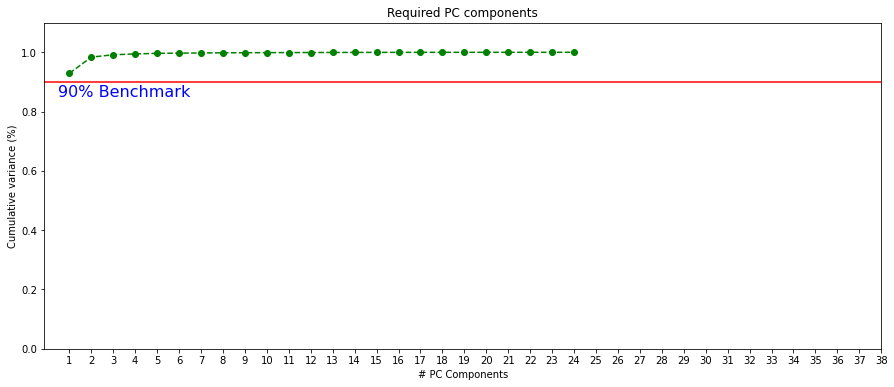

In [11]:
normalization = StandardScaler()
pca_norm = normalization.fit_transform(features)
pca = PCA()
pca_model = pca.fit_transform(pca_norm)
# Plot the cumulative variance for each component
plt.figure(figsize = (15, 6))
PC_Components = np.arange(1, 25, step=1)
Data_variance = np.cumsum(pca.explained_variance_ratio_)
plt.ylim(0.0,1.1)
plt.plot(PC_Components, Data_variance, marker='o', linestyle='--', color='green')
plt.xlabel('# PC Components')
plt.xticks(np.arange(1, 39, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Required PC components')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.85, '90% Benchmark', color = 'Blue', fontsize=16)
plt.show()

##### 3.2 Construct PCA Load Matrix Dataframe based on number of PCA Components

From the above cummulative variance plot the number of PC components can be only two, infact only one is required. But for a 
precise note the 100% data variance is utilised and not just above 90%. Thus reduced the number of features from 23 to four.

For a <b>research basis</b> the PCA svd solver{‘auto’, ‘full’, ‘arpack’, ‘randomized’} shall be given the priority.

In [12]:
pca = PCA(n_components=4,svd_solver = 'auto')
Principal_components=pca.fit_transform(features)
pca_features = pd.DataFrame(data = Principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4'])
pca_labels = pd.DataFrame(data = labels, columns = ['Labels'])
pca_features_labels = pd.concat([pca_features, pca_labels], axis=1)
pca_features_labels['Labels'] = pca_features_labels['Labels'].astype(int)
print(pca_features_labels)

              PC 1        PC 2        PC 3         PC 4  Labels
0     -2546.317911  320.829681   63.511195   -19.068586       6
1      -674.591399 -729.248355  250.992207   -96.123584       4
2      -623.699786 -747.156059  217.190074   -19.315706       4
3     11639.306490 -713.470429  393.328574  2044.426326       4
4     -2442.536578  281.119137   39.553114   -28.188696       2
...            ...         ...         ...          ...     ...
3999  -2308.065910  273.000365   50.207925    -8.763115       6
4000  -1812.272961   -9.382608  -96.974670   -35.585974       0
4001  -2191.553255  -84.535655   71.584776    41.322952       4
4002  -2509.861537  285.730506   69.600786    -9.047908       2
4003  -2266.078870  303.157357   43.602714   -17.382192       2

[4004 rows x 5 columns]


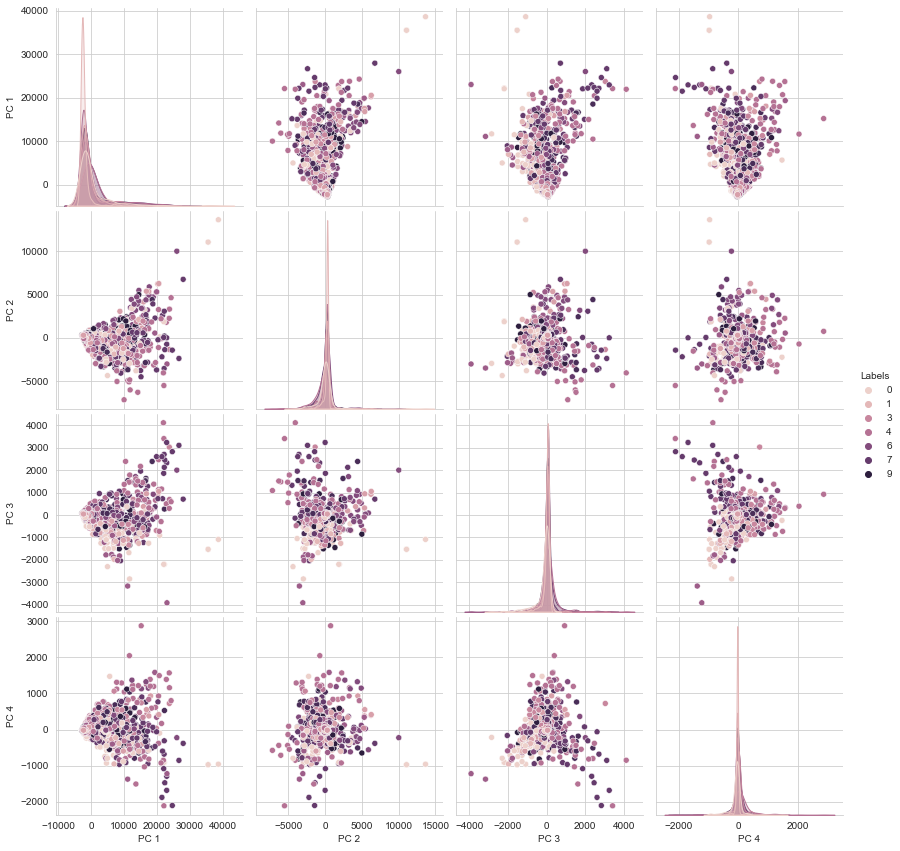

In [13]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(pca_features_labels, hue='Labels', height=3);
plt.show()

### 4. FINDING OPTIMAL K-VALUE FOR KNN

##### 4.1 Elbow Method

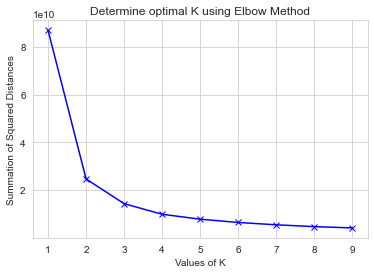

In [14]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(pca_features)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Summation of Squared Distances') 
plt.title('Determine optimal K using Elbow Method')
plt.show()

##### 4.2 Gap Statistic Method

In [15]:
from gap_statistic import OptimalK
from sklearn.cluster import KMeans
def KMeans_cluster(X, k): 
    m = KMeans(random_state=11, n_clusters=k)
    m.fit(X)
    return m.cluster_centers_, m.predict(X)
K_value = OptimalK(clusterer=KMeans_cluster)
n_clusters = K_value(pca_features, cluster_array=np.arange(1, 15))
K_value.gap_df[['n_clusters', 'gap_value']]

,n_clusters,gap_value
0,1.0,2.145544
1,2.0,2.554446
2,3.0,2.815110
3,4.0,2.977026
4,5.0,3.001762
5,6.0,3.000427
6,7.0,3.025934
7,8.0,3.064340
8,9.0,3.116563
9,10.0,3.147529


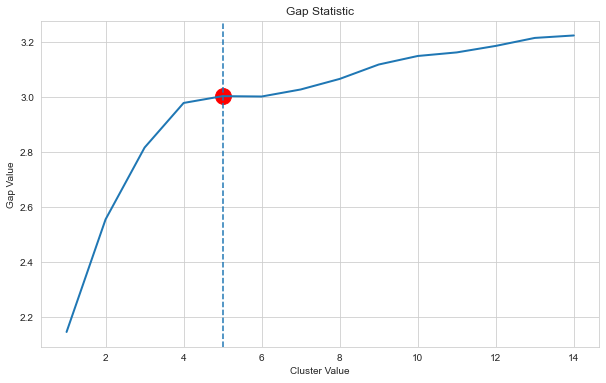

In [16]:
plt.figure(figsize=(10,6))
n_cluster=5
plt.plot(K_value.gap_df.n_clusters, K_value.gap_df.gap_value, linewidth=2)
plt.scatter(K_value.gap_df[K_value.gap_df.n_clusters == n_cluster].n_clusters,
            K_value.gap_df[K_value.gap_df.n_clusters == n_cluster].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Value')
plt.ylabel('Gap Value')
plt.title('Gap Statistic')
plt.axvline(5, linestyle="--")
plt.show()

##### 4.3 Silhouette Method

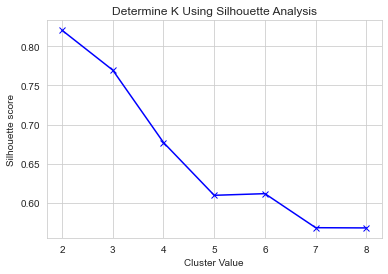

In [17]:
n_cluster = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in n_cluster:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_features)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(pca_features, cluster_labels))
plt.plot(n_cluster,silhouette_avg,'bx-')
plt.xlabel('Cluster Value') 
plt.ylabel('Silhouette score') 
plt.title('Determine K Using Silhouette Analysis')
plt.show()

### 5. BUILDING THE MODEL

In [18]:
Features,Labels = pca_features_labels.values[:,:-1], pca_features_labels.values[:,-1]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size = 0.20, random_state = 42)
#The selected value of K is 2. To check again the model accuracy with repective K's
k_value = range(1,26)
a_metric = []
for k in k_value:
    classifier = KNeighborsClassifier(n_neighbors = k, algorithm ='ball_tree', metric = 'minkowski', p = 5)
    classifier.fit(X_train, y_train)
    y_pred=classifier.predict(X_train)
    a_metric.append(metrics.accuracy_score(y_train,y_pred))    

Text(0, 0.5, 'Validation Accuracy')

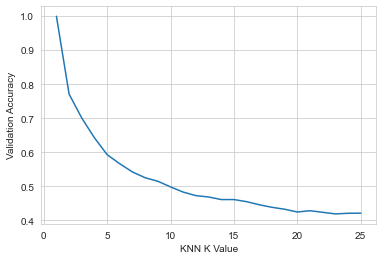

In [20]:
%matplotlib inline
plt.plot(k_value,a_metric)
plt.xlabel("KNN K Value")
plt.ylabel("Validation Accuracy")

In [21]:
# The value of K is again identified to be 2
classifier = KNeighborsClassifier(n_neighbors = 2, algorithm ='ball_tree', metric = 'minkowski', p = 5)
classifier.fit(X_train, y_train)
ypred=classifier.predict(X_train)

#### 5.1 Train Accuracy

In [22]:
cr = classification_report(y_train, ypred)
print('Classification Report:')
print (cr)
Metric_Train = accuracy_score(y_train,ypred)
print('Accuracy:',Metric_Train)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81       334
         1.0       0.82      0.94      0.88       309
         2.0       0.65      0.90      0.75       317
         3.0       0.67      0.88      0.76       310
         4.0       0.75      0.86      0.80       324
         5.0       0.87      0.71      0.78       319
         6.0       0.85      0.74      0.79       315
         7.0       0.84      0.66      0.74       325
         8.0       0.92      0.60      0.73       326
         9.0       1.00      0.43      0.60       324

    accuracy                           0.77      3203
   macro avg       0.80      0.77      0.76      3203
weighted avg       0.81      0.77      0.76      3203

Accuracy: 0.7708398376522011


#### 5.2 Prediction And Test Accuracy

In [23]:
ypred=classifier.predict(X_test)
Metric_Test = accuracy_score(y_test,ypred)
print('Accuracy:',Metric_Test)

Accuracy: 0.4656679151061174


#### 5.3 Hyperparameter Tuning- Grid Search 

In [24]:
grid_size = list(range(1,500))
n_cluster = list(range(1,3))
p=[1,2]

hyperparameters = dict(leaf_size=grid_size, n_neighbors=n_cluster, p=p)
GS = GridSearchCV(classifier, hyperparameters, cv=20)

best_model = GS.fit(X_train,y_train)

ypred = best_model.predict(X_test)

Metric_HT = accuracy_score(y_test,ypred)
print('Accuracy:',Metric_HT)

Accuracy: 0.5655430711610487


### THE END